In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn. model_selection import learning_curve

In [2]:
rng = np.random.default_rng(seed = 42)
#data 

m = 200 #instances

x = 6 * rng.random((m , 1)) - 3
y = 0.5 * x ** 2 + x + 2 + rng.standard_normal((m , 1))

(np.float64(-3.0), np.float64(3.0), np.float64(0.0), np.float64(10.0))

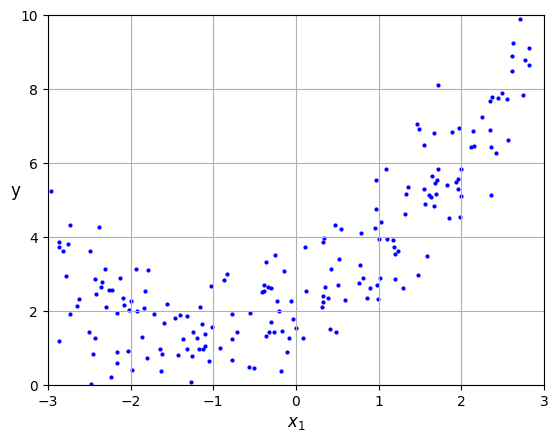

In [3]:
plt.scatter(x , y , c="b" , s=4)
plt.grid()
plt.xlabel(fr"$x_1$" , fontsize=12)
plt.ylabel("y" , fontsize=12 , rotation=0)
plt.axis([-3 , 3 , 0 , 10])

Text(0.5, 1.0, 'without Poly Features')

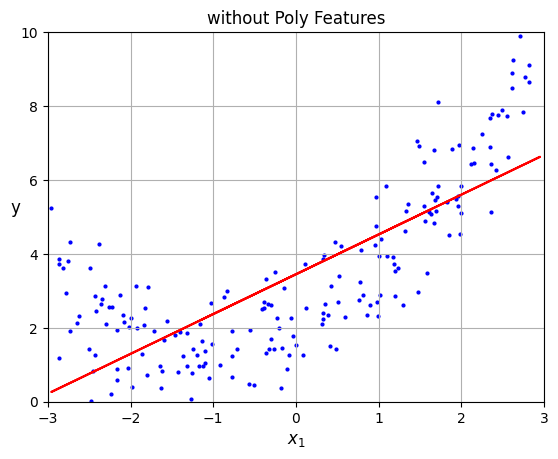

In [4]:
lin_reg_without_processing = LinearRegression()
lin_reg_without_processing.fit(x,y)
y_pred = lin_reg_without_processing.predict(x)

plt.scatter(x , y , c="b" , s=4)
plt.grid()
plt.xlabel(fr"$x_1$" , fontsize=12)
plt.ylabel("y" , fontsize=12 , rotation=0)
plt.axis([-3 , 3 , 0 , 10])
plt.plot(x , y_pred , "r-")
plt.title("without Poly Features")

In [5]:
lin_reg_without_processing.coef_ , lin_reg_without_processing.intercept_

(array([[1.07636931]]), array([3.44731423]))

Text(0.5, 1.0, 'with Poly Features')

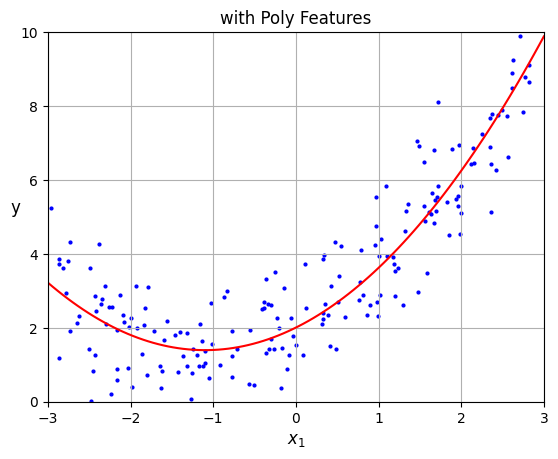

In [6]:
poly_features = PolynomialFeatures(degree=2 , include_bias=False)
x_poly = poly_features.fit_transform(x)
lin_reg  = LinearRegression()
lin_reg.fit(x_poly , y)

x_new = np.linspace(-3 , 3 , 100).reshape(100,1)
x_new_poly = poly_features.fit_transform(x_new)
y_pred = lin_reg.predict(x_new_poly)

plt.scatter(x , y , c="b" , s=4)
plt.grid()
plt.xlabel(fr"$x_1$" , fontsize=12)
plt.ylabel("y" , fontsize=12 , rotation=0)
plt.axis([-3 , 3 , 0 , 10])
plt.plot(x_new , y_pred , "r-")
plt.title("with Poly Features")

In [7]:

lin_reg.coef_ , lin_reg.intercept_


(array([[1.11022126, 0.50526985]]), array([2.00540719]))

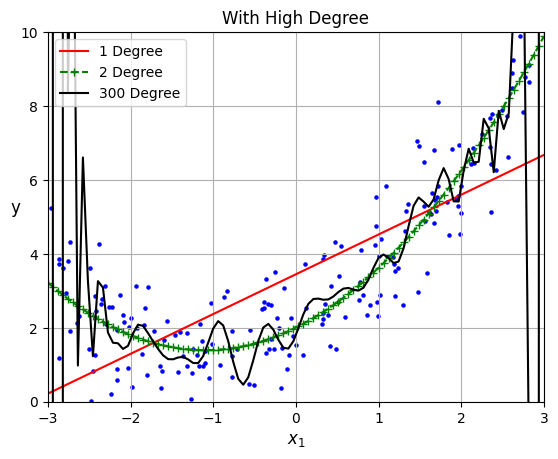

In [17]:
def plot_degree(degree, x , y  , color , label=None):
    
    lin_reg_new = LinearRegression()
    poly_features = PolynomialFeatures(degree=degree , include_bias=False)
    lin_reg_pipeline = make_pipeline(poly_features , StandardScaler() , LinearRegression())
    lin_reg_pipeline.fit(x , y)
    
    x_new = np.linspace(-3 , 3 , 100).reshape(100,1)
    
    y_pred = lin_reg_pipeline.predict(x_new)
    
    plt.plot(x_new , y_pred , color , label=label)
        
    
plot_degree(1 , x , y , "r-" , "1 Degree")
plot_degree(2 , x , y , "g--+" , "2 Degree")
plot_degree(300 , x , y , "k-" , "300 Degree")
plt.scatter(x , y , c="b" , s=5)
plt.grid()
plt.xlabel(fr"$x_1$" , fontsize=12)
plt.ylabel("y" , fontsize=12 , rotation=0)
plt.axis([-3 , 3 , 0 , 10])
plt.title("With High Degree")
plt.legend(loc="upper left")

In [18]:
#learning curve 

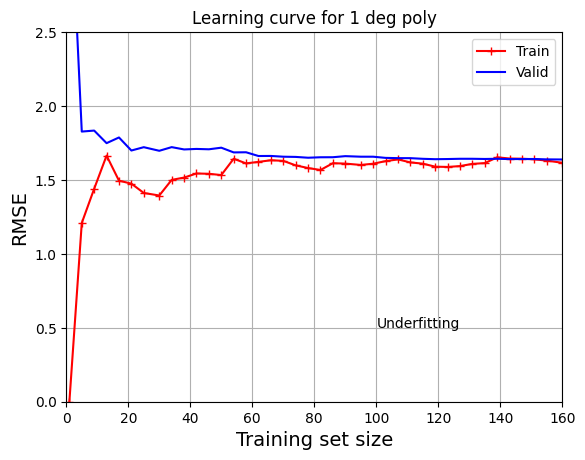

In [28]:
train_size , train_score , valid_score = learning_curve(
    LinearRegression() , x , y , train_sizes=np.linspace(0.01 , 1.0 , 40),
    cv = 5 , scoring="neg_root_mean_squared_error")
train_errors = -train_score.mean(axis=1)
valid_errors = -valid_score.mean(axis =1)

plt.plot(train_size , train_errors , "r-+" , label="Train")
plt.plot(train_size , valid_errors , "b-" , label="Valid")
plt.legend(loc="upper right")
plt.grid()
plt.axis([0 , 160 , 0. , 2.5])
plt.xlabel("Training set size" , fontsize=14)
plt.ylabel("RMSE" , fontsize=14)
plt.title("Learning curve for 1 deg poly" , fontsize=12)
plt.text(100  , 0.5 , "Underfitting")
plt.show()

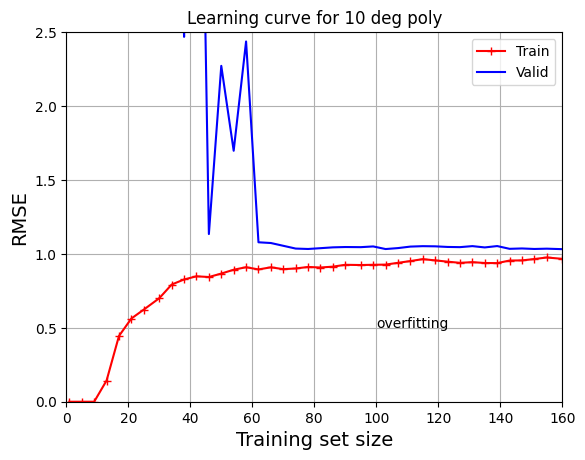

In [30]:
#for poly dataset

poly_features = PolynomialFeatures(degree = 10 , include_bias=False)

lin_reg_pipeline = make_pipeline(poly_features , StandardScaler() , LinearRegression())
train_size , train_score , valid_score = learning_curve(lin_reg_pipeline , x , y , 
                                                        train_sizes=np.linspace(0.01 , 1 , 40),
                                                        cv=5 , scoring="neg_root_mean_squared_error")
train_errors = -train_score.mean(axis=1)
valid_errors = -valid_score.mean(axis =1)

plt.plot(train_size , train_errors , "r-+" , label="Train")
plt.plot(train_size , valid_errors , "b-" , label="Valid")
plt.legend(loc="upper right")
plt.grid()
plt.axis([0 , 160 , 0. , 2.5])
plt.xlabel("Training set size" , fontsize=14)
plt.ylabel("RMSE" , fontsize=14)
plt.title("Learning curve for 10 deg poly" , fontsize=12)
plt.text(100  , 0.5 , "overfitting")
plt.show()

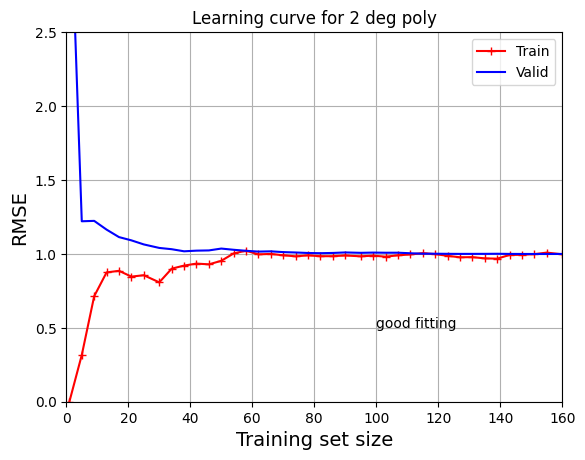

In [29]:
#for poly dataset

poly_features = PolynomialFeatures(degree = 2 , include_bias=False)

lin_reg_pipeline = make_pipeline(poly_features , StandardScaler() , LinearRegression())
train_size , train_score , valid_score = learning_curve(lin_reg_pipeline , x , y , 
                                                        train_sizes=np.linspace(0.01 , 1 , 40),
                                                        cv=5 , scoring="neg_root_mean_squared_error")
train_errors = -train_score.mean(axis=1)
valid_errors = -valid_score.mean(axis =1)

plt.plot(train_size , train_errors , "r-+" , label="Train")
plt.plot(train_size , valid_errors , "b-" , label="Valid")
plt.legend(loc="upper right")
plt.grid()
plt.axis([0 , 160 , 0. , 2.5])
plt.xlabel("Training set size" , fontsize=14)
plt.ylabel("RMSE" , fontsize=14)
plt.title("Learning curve for 2 deg poly" , fontsize=12)
plt.text(100  , 0.5 , "good fitting")
plt.show()